In [1]:
using Distances
using DataStructures
using TextModel
using SimilaritySearch
using JSON
using PyCall
using PyPlot
using Reactive, Interact, Compose
@pyimport sklearn.datasets as datagen
include("../src/fft.jl")


Use "abstract type Language end" instead.

Use "abstract type DanishLanguage<:Language end" instead.

Use "abstract type DutchLanguage<:Language end" instead.

Use "abstract type EnglishLanguage<:Language end" instead.

Use "abstract type FinnishLanguage<:Language end" instead.

Use "abstract type FrenchLanguage<:Language end" instead.

Use "abstract type GermanLanguage<:Language end" instead.

Use "abstract type HungarianLanguage<:Language end" instead.

Use "abstract type ItalianLanguage<:Language end" instead.

Use "abstract type NorwegianLanguage<:Language end" instead.

Use "abstract type PortugueseLanguage<:Language end" instead.

Use "abstract type RomanianLanguage<:Language end" instead.

Use "abstract type RussianLanguage<:Language end" instead.

Use "abstract type SpanishLanguage<:Language end" instead.

Use "abstract type SwedishLanguage<:Language end" instead.

Use "abstract type TurkishLanguage<:Language end" instead.

Use "abstract type AbstractDocument end" instead.

Us

fft (generic function with 2 methods)

In [140]:
function plot_clusters(data,labels,centers)
    pygui(false)
    PyPlot.hold(true)
    colors=["ro","bo","go","mo","co","yo",
        "r^","b^","g^","m^","c^","y^",
        "r*","b*","g*","m*","c*","y*"]
    ci=1
    for l in Set(labels)
        ind=[i for (i,v) in enumerate(labels) if v==l]
        plot(data[ind,1],data[ind,2], colors[ci])
        ci=ci+1
    end
    plot(data[centers,1],data[centers,2], "k8", markersize=10)
end

plot_clusters (generic function with 1 method)

In [5]:
function lassign(data,centers)
    labels=[]
    for i in 1:length(data[:,1]) 
        x=data[i,:]
        dist=sort([(evaluate(Euclidean(), x,data[c,:]),c) for c in centers])
        push!(labels,dist[1][2])
    end
    return labels
end

lassign (generic function with 1 method)

In [6]:
function ffte(data,k::Int64)
    n=length(data[:,1])
    dst=KnnResult(n)
    c=rand(1:n)
    centers=[c]
    [push!(dst,i,Inf) for i in 1:n if i!=c]
    dd=[]
    while length(centers)<k
        dstn=KnnResult(n)
        c=last(centers)
        for nn in dst
            d=evaluate(Euclidean(), data[c,:],data[nn.objID,:])
            d = d<nn.dist ? d : nn.dist
            push!(dstn,nn.objID,d)
        end
        fn=pop!(dstn)
        dst=dstn
        push!(centers,fn.objID)
        push!(dd,fn.dist)
    end
    labels= lassign(data,centers)
    return centers, labels, dd               
end

ffte (generic function with 1 method)

In [7]:
function fftp(data,k::Int64)
    n=length(data[:,1])
    c=rand(1:n)
    centers=[c]
    partitions=[c for i in 1:n]
    dd=[]
    while length(centers)<k
        res=KnnResult(length(centers))
        for c in centers
            ind=[(i,l) for (i,l) in enumerate(partitions) if l==c]
            dist=sort([(evaluate(Euclidean(), data[c],data[i]),i) for (i,x) in ind])
            push!(res,last(dist)[2],last(dist)[1])
        end
        push!(centers,last(res).objID) 
        push!(dd,last(res).dist)
        partitions = lassign(data,centers)
    end
    return centers,partitions,dd              
end

fftp (generic function with 1 method)

In [199]:
r,y=datagen.make_blobs(n_samples=1000,centers=5);

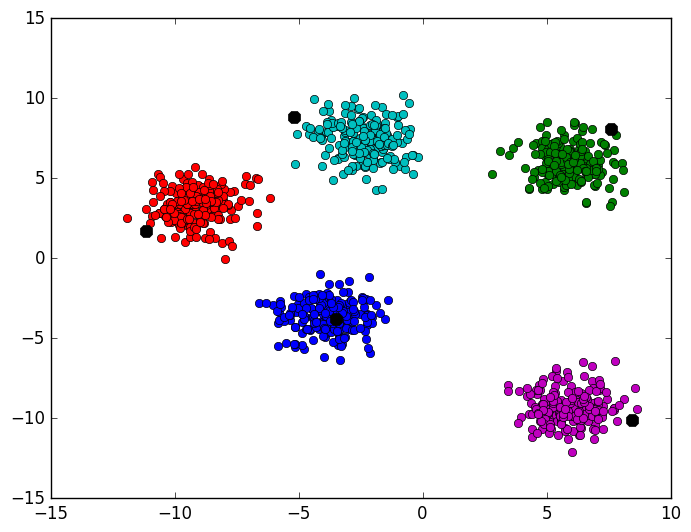

4-element Array{Any,1}:
 16.2484 
 13.497  
 12.719  
  9.29615

In [201]:
centros,lb,dd=ffte(r,5);
plot_clusters(r,y,centros)
dd

In [152]:
r1,y1 = datagen.make_moons(n_samples=1000,noise=0.1)

([-1.01258 -0.00181751; 2.16416 0.233419; … ; 1.04217 -0.336058; 0.391495 0.916356], [0, 1, 0, 0, 0, 0, 0, 1, 1, 1  …  1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

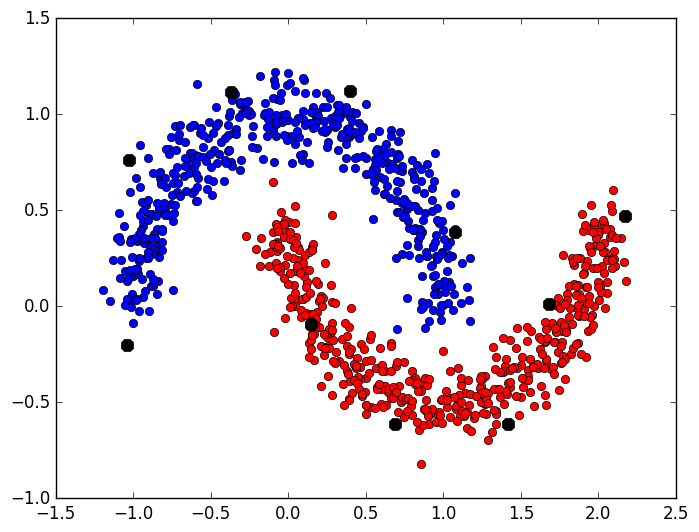

9-element Array{Any,1}:
 3.0574  
 1.81183 
 1.48708 
 0.983638
 0.923995
 0.898346
 0.846498
 0.834634
 0.550233

In [154]:
centros1,lb1,dd1=ffte(r1,10);
plot_clusters(r1,y1,centros1)
dd

In [365]:
include("../src/fft.jl")

fft (generic function with 2 methods)

In [366]:
config=TextConfig(); config.nlist=[2]; config.qlist=[5];config.skiplist = []
tweets,vbows=list_of_items("../data/pionalisis.json","text",config);

In [371]:
c=fft(vbows[1:100],tweets[1:100],config,"text","3","maxmin");

>>>>>>>>>>>>>>> 100 1.5707963267948966 46
>>>>>>>>>>>>>>> 97 1.5707963267948966 45
>>>>>>>>>>>>>>> 96 1.5707963267948966 44
>>>>>>>>>>>>>>> 98 1.5707963267948966 25
>>>>>>>>>>>>>>> 89 1.5707963267948966 24
>>>>>>>>>>>>>>> 84 1.5707963267948966 23
>>>>>>>>>>>>>>> 95 1.5707963267948966 23
>>>>>>>>>>>>>>> 94 1.5707963267948966 22
>>>>>>>>>>>>>>> 91 1.5707963267948966 21


In [372]:
c1=fft(vbows[1:100],tweets[1:100],config,"text","3","approx_maxmin");

INFO: XXX SimilaritySearch.BeamSearch. Starting parameter optimization; expected recall: 0.9, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 1, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10156249999999996, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":1}, perf: {"recall":-0.10156249999999996,"seconds":3.3408403396606445e-5,"distances":0.0} candidates: 2, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 2, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10156249999999996, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":1}, perf: {"recall":-0.10156249999999996,"seconds":3.3408403396606445e-5,"distances":0.0} candidates: 2, n: 7
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 3, expected recall: 0.9, n: 7
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: -0.10156249999999996, conf: {"candidates_size":1,"montecarlo_size":1,"beam_

INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.08750000000000001, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.08750000000000001,"seconds":3.851763904094696e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 3, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.08750000000000001, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.08750000000000001,"seconds":3.851763904094696e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 4, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.08750000000000001, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.08750000000000001,"seconds":3.851763904094696e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 5, expected recal

INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 6, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 7, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 8, expected re

>>>>>> Length: 1
Any[34]
>>>>>> Length: 2
Any[34, 41]
>>>>>> Length: 3
Any[34, 41, 8]


INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0} candidates: 2, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 17, expected recall: 0.9, n: 31
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0} candidates: 1, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 18, expected recall: 0.9, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Optimization done; fitness: 0.03515624999999999, conf: {"candidates_size":4,"montecarlo_size":3,"beam_size":4}, perf: {"recall":0.03515624999999999,"seconds":4.0901824831962585e-5,"distances":0.0}, n: 31
INFO: XXX SimilaritySearch.BeamSearch. Starting parameter optimization; expec

INFO: *** SimilaritySearch.BeamSearch. A new best conf was found> fitness: 0.18671875000000002, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":5}, perf: {"recall":0.18671875000000002,"seconds":3.263726830482483e-5,"distances":0.0}, candidates: 9, n: 15
INFO: *** SimilaritySearch.BeamSearch. A new best conf was found> fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":7}, perf: {"recall":0.21484375000000006,"seconds":3.184564411640167e-5,"distances":0.0}, candidates: 14, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":7}, perf: {"recall":0.21484375000000006,"seconds":3.184564411640167e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 2, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_siz

>>>>>> Length: 1
Any[10]
>>>>>> Length: 2
Any[10, 35]
>>>>>> Length: 3
Any[10, 35, 2]


INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":7}, perf: {"recall":0.21484375000000006,"seconds":3.184564411640167e-5,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 17, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":7}, perf: {"recall":0.21484375000000006,"seconds":3.184564411640167e-5,"distances":0.0} candidates: 1, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 18, expected recall: 0.9, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Optimization done; fitness: 0.21484375000000006, conf: {"candidates_size":1,"montecarlo_size":1,"beam_size":7}, perf: {"recall":0.21484375000000006,"seconds":3.184564411640167e-5,"distances":0.0}, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Starting parameter optimization; expected

INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 2, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 3, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 4, expected

>>>>>> Length: 1
Any[30]
>>>>>> Length: 2
Any[30, 54]
>>>>>> Length: 3
Any[30, 54, 7]


INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 16, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 2, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 17, expected recall: 0.9, n: 15
INFO: === SimilaritySearch.BeamSearch. Iteration finished; fitness: 0.09218749999999999, conf: {"candidates_size":2,"montecarlo_size":4,"beam_size":4}, perf: {"recall":0.09218749999999999,"seconds":0.00011261925101280212,"distances":0.0} candidates: 1, n: 15
INFO: XXX SimilaritySearch.BeamSearch. Iteration: 18, expec

LoadError: [91mBoundsError: attempt to access 0-element Array{Pair{Int64,Float64},1} at index [1][39m

In [176]:
@pyimport matplotlib.patches as patches
function animate_plot(data,centers,dd)
    pygui(true)
    PyPlot.ion()
    figure=PyPlot.figure()
    ax = axes()
    cc=["r","b","g","m","c","y"]
    colors=["ro","bo","go","mo","co","yo",
            "r^","b^","g^","m^","c^","y^",
            "r*","b*","g*","m*","c*","y*"]
    min,max=minimum(data)-dd[1],maximum(data)+dd[1]
    for i = 1:length(centers)
        PyPlot.hold(true)
        ax[:cla]()
        ax[:set_ylim]([min,max])
        ax[:set_xlim]([min,max])
        #axis([0,2pi,-1,1])
        lcenters=centers[1:i]
        println("3333333",lcenters)
        labels=lassign(data,lcenters)
        ci=1
        for l in Set(labels)
            ind=[i for (i,v) in enumerate(labels) if v==l]
            ax[:plot](data[ind,1],data[ind,2], colors[ci])
            ci=ci+1
        end
        r = i>1 ? dd[i-1] : dd[1]
        for j in 1:i
            cc=lcenters[j]
            cir=patches.Circle(data[cc,:],r,
                                fc="blue",alpha=0.1,
                                linewidth=.5,zorder=0)
            ax[:add_artist](cir)
        end
        ax[:plot](data[lcenters,1],data[lcenters,2], "k8", markersize=10)
        #println(keys(ax))
        pause(1)
        PyPlot.draw()
        savefig("plot$i.png")
        PyPlot.hold(false)
    end
end

animate_plot (generic function with 1 method)

In [203]:
animate_plot(r,centros,dd)

3333333[878]
3333333[878, 397]
3333333[878, 397, 424]
3333333[878, 397, 424, 346]
3333333[878, 397, 424, 346, 251]


In [115]:
dd

4-element Array{Any,1}:
 14.1264 
  9.26088
  7.75267
  5.06351

In [167]:
xx=1

1

In [169]:
println("El valor de x es $xx")

El valor de x es 1
